<a href="https://colab.research.google.com/github/Adhittiyaca/House--Price-Prediction/blob/main/01_Adhittiyacaa_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏠 House Price Prediction

**Author:** Adhittiyaca Saroj

**Project Description:**  
This project performs exploratory data analysis (EDA) on the California Housing dataset to understand data patterns and relationships.A simple linear regression model is developed using mathematical formulas to predict median house value.
The work includes

**My Contribution:**  
I worked on data preprocessing and exploratory data analysis of the California Housing dataset.
I implemented simple linear regression from scratch and analyzed the results.

**Status:**  
Work started and maintained by me.

In [68]:
print("House Price Prediction project by Adhittiyaca Saroj")

House Price Prediction project by Adhittiyaca Saroj


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Selection and Loading
The California Housing dataset is used for this project. It contains numerical features related to housing prices and income levels. The dataset is loaded into a pandas DataFrame for further analysis.


In [70]:
df = pd.read_csv('/content/california_housing.csv')
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [71]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("\nColumn Names:\n", df.columns)


Number of rows: 20640
Number of columns: 14

Column Names:
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')


## Data Cleaning and Preprocessing

### Missing Value Analysis
Missing values are checked in the dataset to ensure data completeness. Since no missing values are found, no imputation is required.


In [72]:
for col in df.columns:
    missing = df[col].isnull().sum()
    print(col, ":", missing)


longitude : 0
latitude : 0
housing_median_age : 0
total_rooms : 0
total_bedrooms : 0
population : 0
households : 0
median_income : 0
median_house_value : 0
ocean_proximity_<1H OCEAN : 0
ocean_proximity_INLAND : 0
ocean_proximity_ISLAND : 0
ocean_proximity_NEAR BAY : 0
ocean_proximity_NEAR OCEAN : 0


In [73]:
for col in df.columns:
    mean_val = np.sum(df[col]) / len(df[col])
    df[col] = df[col].fillna(mean_val)


In [74]:
for col in df.columns:
    data = df[col].values
    mean = np.sum(data) / len(data)
    std = np.sqrt(np.sum((data - mean)**2) / len(data))
    minimum = np.min(data)
    maximum = np.max(data)

    print(f"\n{col}")
    print("Mean:", mean)
    print("Std:", std)
    print("Min:", minimum)
    print("Max:", maximum)



longitude
Mean: -119.56970445736432
Std: 2.003483187746976
Min: -124.35
Max: -114.31

latitude
Mean: 35.63186143410853
Std: 2.135900653797483
Min: 32.54
Max: 41.95

housing_median_age
Mean: 28.639486434108527
Std: 12.585252725724606
Min: 1.0
Max: 52.0

total_rooms
Mean: 2635.7630813953488
Std: 2181.5624017359723
Min: 2.0
Max: 39320.0

total_bedrooms
Mean: 537.8705525375617
Std: 419.25643555055336
Min: 1.0
Max: 6445.0

population
Mean: 1425.4767441860465
Std: 1132.434687757615
Min: 3.0
Max: 35682.0

households
Mean: 499.5396802325581
Std: 382.3204908552571
Min: 1.0
Max: 6082.0

median_income
Mean: 3.8706710029069766
Std: 1.8997756945748738
Min: 0.4999
Max: 15.0001

median_house_value
Mean: 206855.81690891474
Std: 115392.82040412253
Min: 14999.0
Max: 500001.0

ocean_proximity_<1H OCEAN
Mean: 0.44263565891472867
Std: 0.4966984320207309
Min: False
Max: True

ocean_proximity_INLAND
Mean: 0.31739341085271316
Std: 0.46546195719950517
Min: False
Max: True

ocean_proximity_ISLAND
Mean: 0.00024

### Outlier Detection Using IQR Method

The Interquartile Range (IQR) method is used for outlier detection.

IQR = Q3 − Q1  
Lower Bound = Q1 − 1.5 × IQR  
Upper Bound = Q3 + 1.5 × IQR  

Any data point lying outside these bounds is considered an outlier.


In [75]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(col, "Outliers:", outliers.shape[0])


longitude Outliers: 0
latitude Outliers: 0
housing_median_age Outliers: 0
total_rooms Outliers: 1287
total_bedrooms Outliers: 1306
population Outliers: 1196
households Outliers: 1220
median_income Outliers: 681
median_house_value Outliers: 1071


### Feature Distribution Analysis
Histograms are plotted for all numerical features to visualize their frequency distribution and identify skewness or spread in the data.


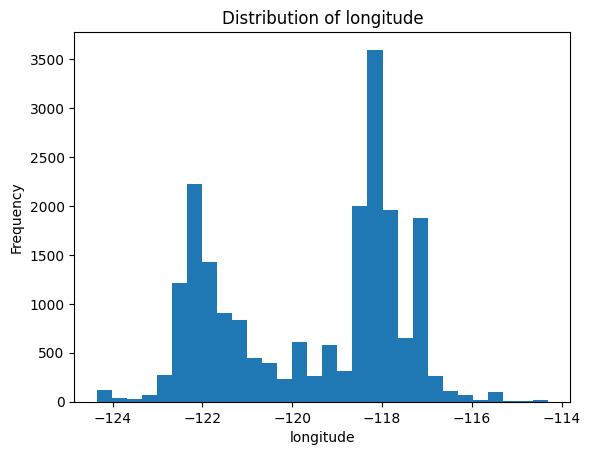

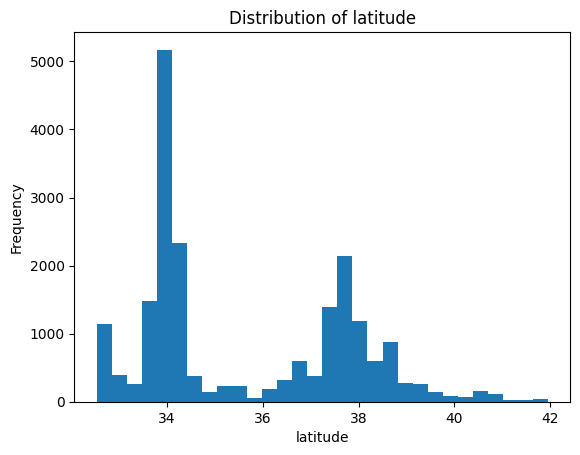

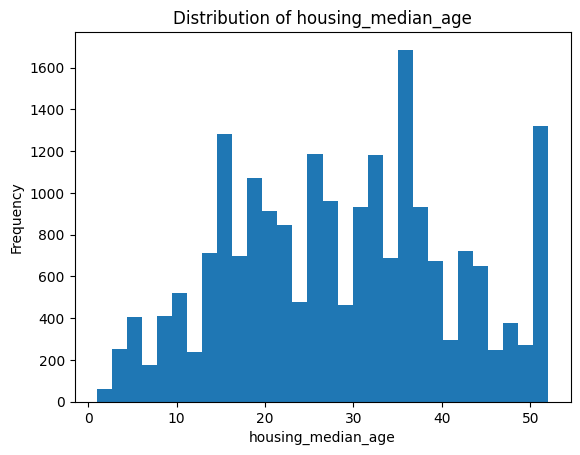

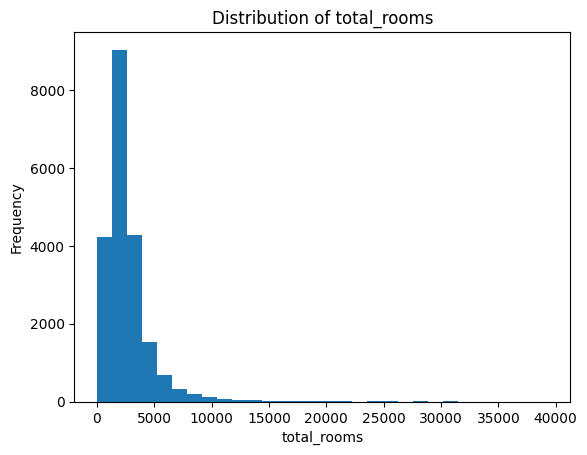

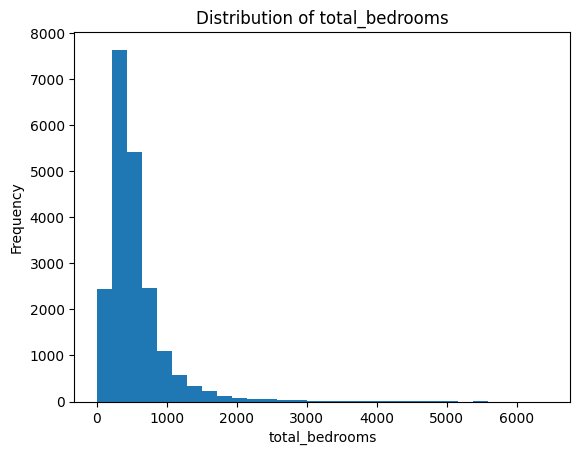

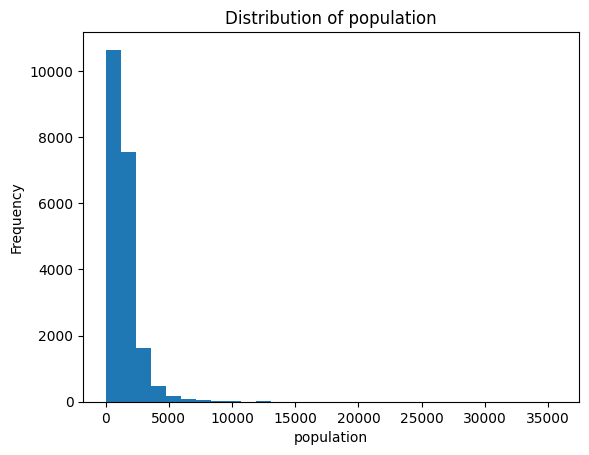

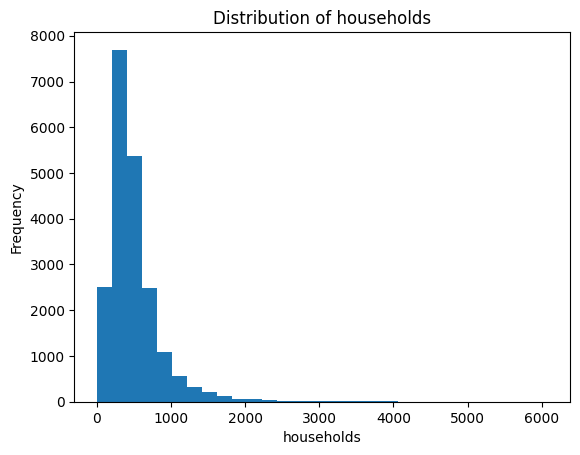

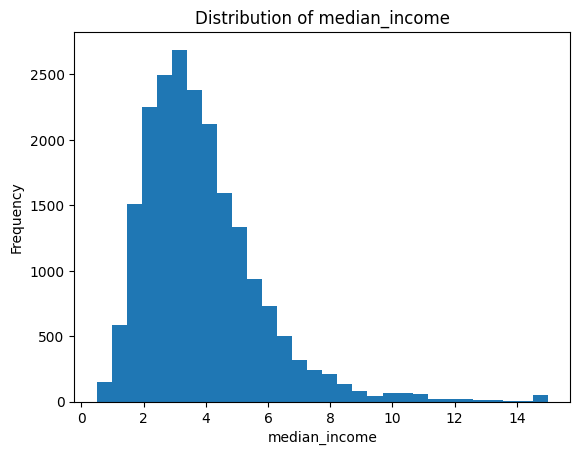

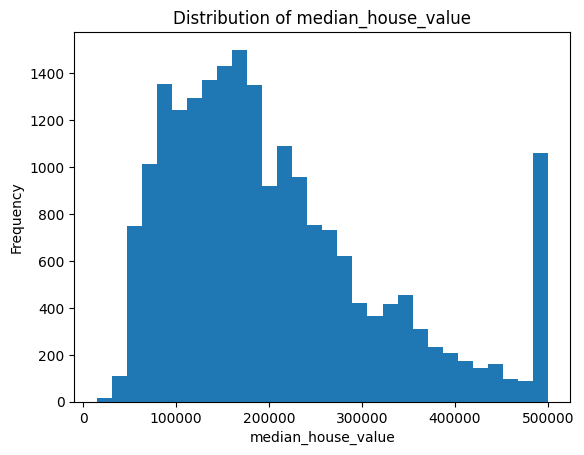

In [76]:
for col in numeric_cols:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


### Correlation Analysis

#### Pearson Correlation Coefficient (Manual Implementation)

The Pearson correlation coefficient is calculated using the formula:

r = Σ[(x − x̄)(y − ȳ)] / √(Σ(x − x̄)² × Σ(y − ȳ)²)

where x̄ and ȳ represent the mean values of x and y respectively.


In [77]:
def manual_correlation(x, y):
    x_mean = np.sum(x) / len(x)
    y_mean = np.sum(y) / len(y)

    num = np.sum((x - x_mean) * (y - y_mean))
    den = np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))
    return num / den


In [78]:
cols = df.columns
corr_matrix = np.zeros((len(cols), len(cols)))

for i in range(len(cols)):
    for j in range(len(cols)):
        corr_matrix[i, j] = manual_correlation(df[cols[i]].values,
                                                df[cols[j]].values)


#### Correlation Heatmap
A heatmap is used to visually represent the correlation matrix, where color intensity indicates the strength and direction of relationships between features.


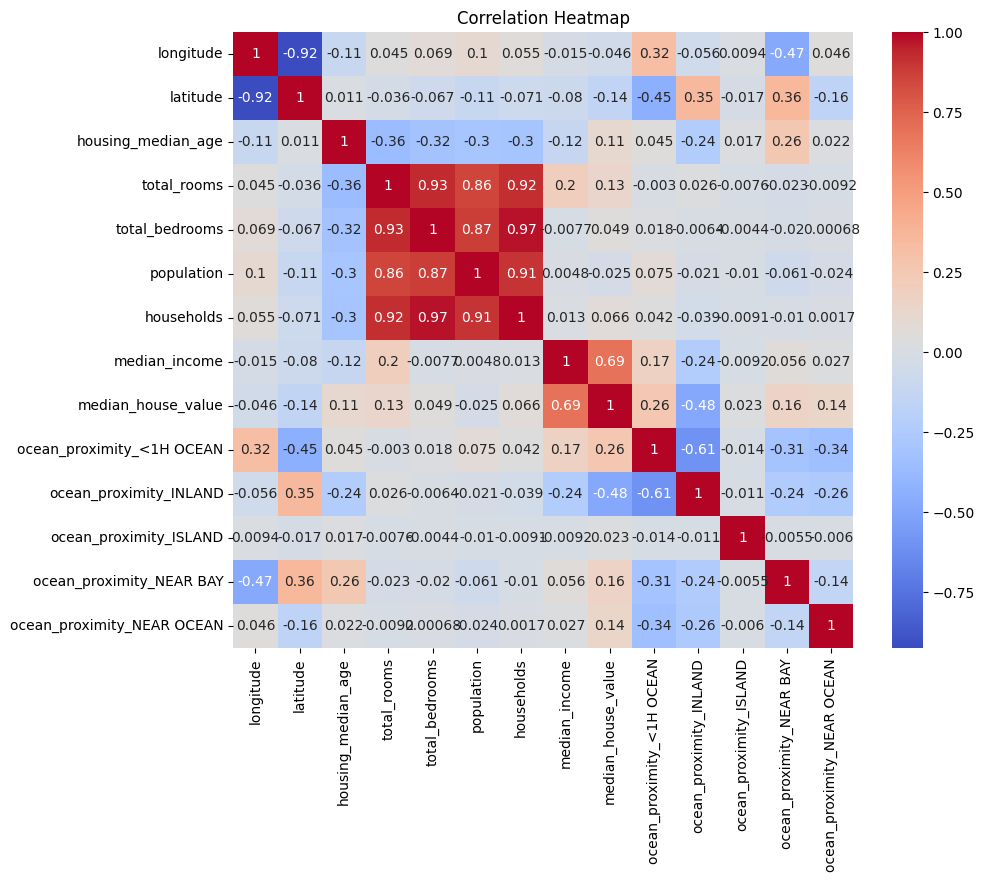

In [79]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, xticklabels=cols, yticklabels=cols,
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Simple Linear Regression

### Model Description
Simple Linear Regression is used to model the relationship between median income (independent variable) and median house value (dependent variable).


In [80]:
X = df['median_income'].values
Y = df['median_house_value'].values
x_mean = np.sum(X) / len(X)
y_mean = np.sum(Y) / len(Y)

numerator = np.sum((X - x_mean) * (Y - y_mean))
denominator = np.sum((X - x_mean)**2)

m = numerator / denominator
c = y_mean - m * x_mean

print("Slope (m):", m)
print("Intercept (c):", c)


Slope (m): 41793.84920189626
Intercept (c): 45085.576703268016


### Mathematical Formulation

The linear regression model is defined as:

y = mx + c

where m is the slope and c is the intercept.


In [81]:
Y_pred = m * X + c


### Regression Line Visualization
The regression line is plotted along with the actual data points to visualize the linear relationship between median income and house value.


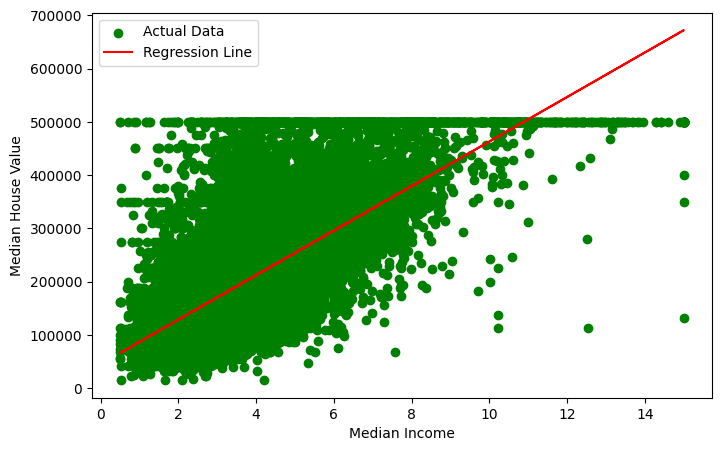

In [82]:
plt.figure(figsize=(8,5))
plt.scatter(X, Y, color='green', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.show()


Slope (m): Indicates that for every 1 unit increase in median income,
the house value increases by m units.

Intercept (c): Represents the estimated house value when median income is zero.


In [83]:
# Total samples
n = len(X)

# 80% training, 20% testing
split_index = int(0.8 * n)
# training set
X_train = X[:split_index]
Y_train = Y[:split_index]
# test set
X_test = X[split_index:]
Y_test = Y[split_index:]


### Train Model on Training Data

In [84]:
# Calculate means
x_mean = np.sum(X_train) / len(X_train)
y_mean = np.sum(Y_train) / len(Y_train)

# Calculate slope (m)
numerator = np.sum((X_train - x_mean) * (Y_train - y_mean))
denominator = np.sum((X_train - x_mean)**2)
m = numerator / denominator

# Calculate intercept (c)
c = y_mean - m * x_mean

print("Slope (m):", m)
print("Intercept (c):", c)


Slope (m): 40795.04535185182
Intercept (c): 47027.447096316086


### Predictions

In [85]:
Y_train_pred = m * X_train + c
Y_test_pred = m * X_test + c


### Mean Squared Error (Train & Test)

In [86]:
mse_train = np.sum((Y_train - Y_train_pred)**2) / len(Y_train)
mse_test = np.sum((Y_test - Y_test_pred)**2) / len(Y_test)

print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)


Training MSE: 7057343223.763511
Testing MSE: 6863699377.589644


### Actual vs Predicted (Training)

###### This plot compares the actual house values with the predicted values obtained from the regression model on the training dataset.
The red diagonal line represents perfect prediction (Predicted = Actual).
The closer the data points lie to this line, the better the model fits the training data.

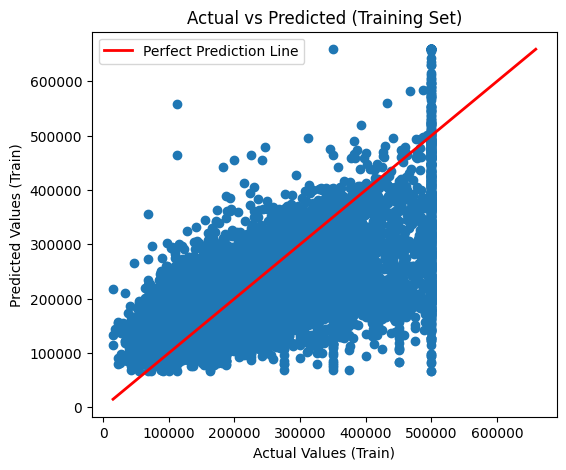

In [91]:
plt.figure(figsize=(6,5))
plt.scatter(Y_train, Y_train_pred)

# Perfect prediction reference line (Diagonal)
min_val = min(min(Y_train), min(Y_train_pred))
max_val = max(max(Y_train), max(Y_train_pred))

plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linewidth=2, label="Perfect Prediction Line")

plt.xlabel("Actual Values (Train)")
plt.ylabel("Predicted Values (Train)")
plt.title("Actual vs Predicted (Training Set)")
plt.legend()
plt.show()


### Actual vs Predicted (Test)

###### This plot evaluates the model’s performance on unseen test data.
The red diagonal line indicates ideal prediction.
If the points are close to this line, the model generalizes well. Significant deviation from the line indicates prediction error.

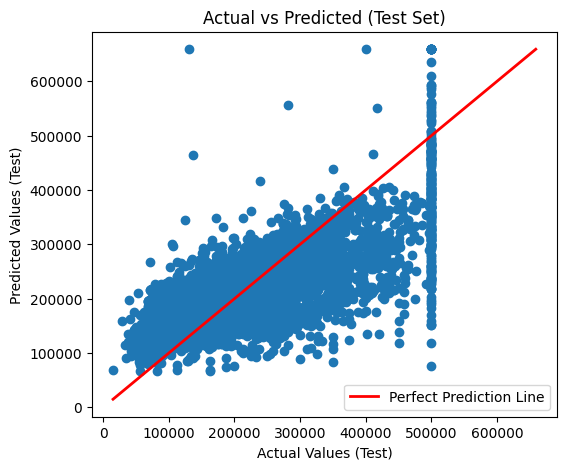

In [92]:
plt.figure(figsize=(6,5))
plt.scatter(Y_test, Y_test_pred)

min_val = min(min(Y_test), min(Y_test_pred))
max_val = max(max(Y_test), max(Y_test_pred))

plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linewidth=2, label="Perfect Prediction Line")

plt.xlabel("Actual Values (Test)")
plt.ylabel("Predicted Values (Test)")
plt.title("Actual vs Predicted (Test Set)")
plt.legend()
plt.show()


### Residual vs Predicted (Training)

##### This plot shows the residuals (Actual − Predicted) against predicted values for the training set.
The red horizontal line represents zero error.
Ideally, residuals should be randomly scattered around this line without forming any clear pattern, which indicates that the model assumptions are satisfied.

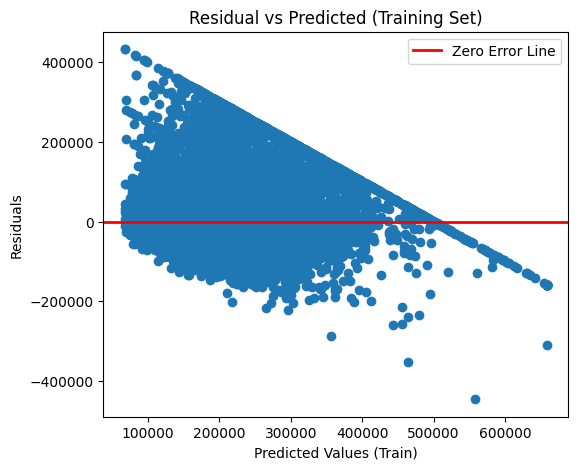

In [93]:
# Calculate residuals
residual_train = Y_train - Y_train_pred

plt.figure(figsize=(6,5))
plt.scatter(Y_train_pred, residual_train)

# Horizontal reference line at 0
plt.axhline(y=0, color='red', linewidth=2, label="Zero Error Line")

plt.xlabel("Predicted Values (Train)")
plt.ylabel("Residuals")
plt.title("Residual vs Predicted (Training Set)")
plt.legend()
plt.show()


### Residual vs Predicted (Test)

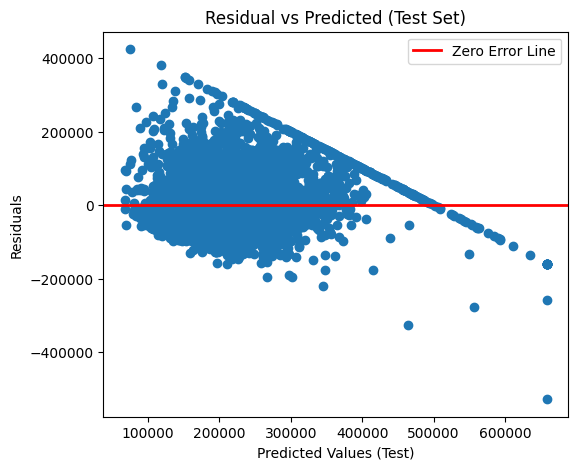

In [94]:
residual_test = Y_test - Y_test_pred

plt.figure(figsize=(6,5))
plt.scatter(Y_test_pred, residual_test)

plt.axhline(y=0, color='red', linewidth=2, label="Zero Error Line")

plt.xlabel("Predicted Values (Test)")
plt.ylabel("Residuals")
plt.title("Residual vs Predicted (Test Set)")
plt.legend()
plt.show()
